# Exploração dados suicídio 

Fonte dos dados: [OpenDataSUS](https://opendatasus.saude.gov.br/dataset/sim/resource/b894426e-83dc-4703-91f8-fe90d9b7f8f0)

## Importar Biliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carregar arquivos CSV

In [17]:
# Lista de anos (add à lista os anos que estão sendo analisados)
anos=['21', '22', '23']

# Lista de arquivos csv que serão analisados
arquivos_csv = ['do21.csv', 'do22.csv', 'do23.csv']

# Definir separador dos dados do seu arquivo
sep = ';' 

# Definir se quer low_memory 
 

for ano, arq in zip(anos, arquivos_csv):
    globals()[f'df{ano}'] = pd.read_csv(arq, sep=sep)

/var/folders/9c/bczl05050cqc6sw00pb2g_1h0000gn/T/ipykernel_23841/447136254.py:14: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f'df{ano}'] = pd.read_csv(arq, sep=sep)
/var/folders/9c/bczl05050cqc6sw00pb2g_1h0000gn/T/ipykernel_23841/447136254.py:14: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f'df{ano}'] = pd.read_csv(arq, sep=sep)
/var/folders/9c/bczl05050cqc6sw00pb2g_1h0000gn/T/ipykernel_23841/447136254.py:14: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f'df{ano}'] = pd.read_csv(arq, sep=sep)


## Dataframes criados

In [11]:
# Printar os dataframes criados anteriormente

print('Dataframes criados:')
for ano in anos:
    print(' - ' + f'df{ano}')

Dataframes criados:
 - df21
 - df22
 - df23


## Informações de cada Dataframe criado

In [15]:
# Informações sobre os datasets criados

for ano in anos:
    print(globals()[f'df{ano}'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832649 entries, 0 to 1832648
Data columns (total 87 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ORIGEM      int64  
 1   TIPOBITO    int64  
 2   DTOBITO     int64  
 3   HORAOBITO   float64
 4   NATURAL     float64
 5   CODMUNNATU  float64
 6   DTNASC      float64
 7   IDADE       int64  
 8   SEXO        int64  
 9   RACACOR     float64
 10  ESTCIV      float64
 11  ESC         float64
 12  ESC2010     float64
 13  SERIESCFAL  float64
 14  OCUP        float64
 15  CODMUNRES   int64  
 16  LOCOCOR     int64  
 17  CODESTAB    float64
 18  ESTABDESCR  float64
 19  CODMUNOCOR  int64  
 20  IDADEMAE    float64
 21  ESCMAE      float64
 22  ESCMAE2010  float64
 23  SERIESCMAE  float64
 24  OCUPMAE     float64
 25  QTDFILVIVO  float64
 26  QTDFILMORT  float64
 27  GRAVIDEZ    float64
 28  SEMAGESTAC  float64
 29  GESTACAO    float64
 30  PARTO       float64
 31  OBITOPARTO  float64
 32  PESO        float64
 33  TPMORTE

## Visualização de cada Dataframe criado

In [44]:
# Heads dos datasets criados
'''
# "Descomentar" essa parte caso queira printar os heads de cada dataframe criado
for ano in anos:
    print(globals()[f'df{ano}'].head())
'''
# Head de um dataset
df22.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CB_PRE,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,21042022,1230.0,835.0,355030.0,29041922.0,499,2,1.0,3.0,4.0,3.0,3.0,999992.0,354850,3,NaN,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,*I219,*I709*I251,*I10X,*I119,*R54X,I219,NaN,354850.0,22042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,I219,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,I219/I709 I251/I10/I119*R54,4052022,NaN,NaN,6.0,0.0,1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2,22042022,1203.0,827.0,270770.0,5071948.0,473,2,1.0,2.0,4.0,2.0,8.0,999992.0,354850,3,NaN,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,*A419,*J180,*N390,*I693,*K573*I709*E149*G319*R268,I693,NaN,354850.0,23042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,I693,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,A419/J180/N390/I693*K573 I709 E149 G319 R268,4052022,NaN,NaN,4.0,0.0,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,2,22042022,1525.0,835.0,354850.0,10101952.0,469,1,2.0,4.0,4.0,3.0,3.0,516335.0,354850,2,7872593.0,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,*A419,*J690,*N390,*N133,*K253*F03X*I10X,N133,NaN,354850.0,23042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,N133,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,A419/J690/N390/N133*K253 F03 I10,4052022,NaN,NaN,6.0,0.0,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1,2,23042022,937.0,835.0,350750.0,25061938.0,483,1,1.0,2.0,5.0,5.0,NaN,261125.0,354850,3,NaN,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,*I269,*I802,*I739,*G309,*G319*N390*R268*J180*F172*I694,I739,NaN,354850.0,23042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,I739,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,I269/I802/I739/G309*G319 N390 R268 J180 F172 I694,4052022,NaN,NaN,8.0,0.0,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,1,2,20042022,1351.0,829.0,291400.0,18101956.0,465,2,1.0,3.0,3.0,2.0,NaN,999992.0,355100,1,2081636.0,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,*J189,NaN,*I10X,*I259,*A483,I259,NaN,NaN,20042022.0,NaN,NaN,NaN,20220025.0,N,NaN,I259,29042022.0,1.0,S,S,3.2.30,3.4,NaN,4052022.0,J189/ /I10/I259*A483,4052022,NaN,NaN,11.0,0.0,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


# Causas de morte
## Coluna CAUSABAS

#### Suicídios
Óbitos provocados pela própria vítima. Dados adquiridos pelos códigos da CID-10: 
- **X60**-**X84** (Lesões autoprovocadas intencionalmente)


Fonte: TABNET/DATASU

### Quantidade de suicídios por CID por dataframe

In [56]:
# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Lista codigos CID que contemplam suicídios
codigos_suicidio = ['X060', 'X061', 'X062', 'X063', 'X064', 'X065', 'X066', 'X067', 'X068', 'X069', 'X070', 'X071', 'X072', 'X073', 'X074', 'X075', 'X076', 'X077', 'X078', 'X079', 'X080', 'X081', 'X082', 'X083', 'X084']


# Loop pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano = df[df['CAUSABAS'].isin(codigos_suicidio)]
    
    # Calcular a contagem dos valores
    causabas_counts = suicidios_ano['CAUSABAS'].value_counts()
    
    # Imprimir os resultados
    print('Causas do ano 20' + ano)
    print(causabas_counts)
    print('-------------------------')

Causas do ano 2021
CAUSABAS
X080    28
X060     3
X084     3
X069     1
X081     1
X068     1
Name: count, dtype: int64
-------------------------
Causas do ano 2022
CAUSABAS
X080    37
X084     8
X069     2
X068     2
X060     1
Name: count, dtype: int64
-------------------------
Causas do ano 2023
CAUSABAS
X080    22
X084     5
X081     3
X060     2
Name: count, dtype: int64
-------------------------


### Quantidade de suicídios diretamente declarados por dataframe

In [57]:
# Codigos de Circunstância de Obitos
# 2 = Suicídio
co = [2]

# Loop de busca pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano = df[df['CIRCOBITO'].isin(co)]
    
    # Calcular a contagem dos valores
    co_counts = suicidios_ano['CIRCOBITO'].value_counts()
    
    # Imprimir os resultados
    print('Circ. Óbito do ano 20' + ano)
    print(co_counts)
    print('-------------------------')

Circ. Óbito do ano 2021
CIRCOBITO
2.0    14724
Name: count, dtype: int64
-------------------------
Circ. Óbito do ano 2022
CIRCOBITO
2.0    15679
Name: count, dtype: int64
-------------------------
Circ. Óbito do ano 2023
CIRCOBITO
2.0    13337
Name: count, dtype: int64
-------------------------


## O que podemos considerar? 

Pela análise exploratória acima, ficou evidente que os códigos do CID não são úteis para definir o número total de suicídios para cada ano. 

> Os códigos do CID estão estão delcarados nas colunas '**CAUSABAS**'

Por fim, os códigos de circunstância de óbito representam com maior fidedignidade a quantidade de suicídios para cada ano.

> Os códigos das circunstâncias de óbito estão declarados na coluna '**CIRCOBITO**', sendo o valor **2** o que representa suicídio

### Logo abaixo, encontram-se os totais de registros que utilizam CID ou código de circunstância

In [58]:
# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dicionário para armazenar as contagens totais
total_counts_causa = {}
total_counts_circo = {}

# Loop pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano_cid = df[df['CAUSABAS'].isin(codigos_suicidio)]
    suicidios_ano_circo = df[df['CIRCOBITO'].isin(co)]
    
    # Calcular a contagem dos valores para o ano atual
    causabas_counts = suicidios_ano_cid['CAUSABAS'].value_counts()
    co_counts = suicidios_ano_circo['CIRCOBITO'].value_counts()
    
    # Atualizar as contagens totais para CAUSABAS
    for causa, count in causabas_counts.items():
        total_counts_causa[causa] = total_counts_causa.get(causa, 0) + count
        
    # Atualizar as contagens totais para CIRCOBITO
    for circo, count in co_counts.items():
        total_counts_circo[circo] = total_counts_circo.get(circo, 0) + count

# Imprimir o total de suicídios por código CAUSABAS
print('Total de suicídios por código CAUSABAS:')
for causa, count in total_counts_causa.items():
    print(f'Código: {causa}, Total: {count}')

# Imprimir separador
print(50*'-')

# Imprimir o total de suicídios por código CIRCOBITO
print('Total de suicídios por código CIRCOBITO:')
for circo, count in total_counts_circo.items():
    print(f'Código: {circo}, Total: {count}')


Total de suicídios por código CAUSABAS:
Código: X080, Total: 87
Código: X060, Total: 6
Código: X084, Total: 16
Código: X069, Total: 3
Código: X081, Total: 4
Código: X068, Total: 3
--------------------------------------------------
Total de suicídios por código CIRCOBITO:
Código: 2.0, Total: 43740


# Plotar gráficos para compararmos CAUSABAS e CIRCOBITO

Percebe-se que o total de suicídios contabilizados pelo CID são ocultados quando contabilizados pelo código de circunstância.

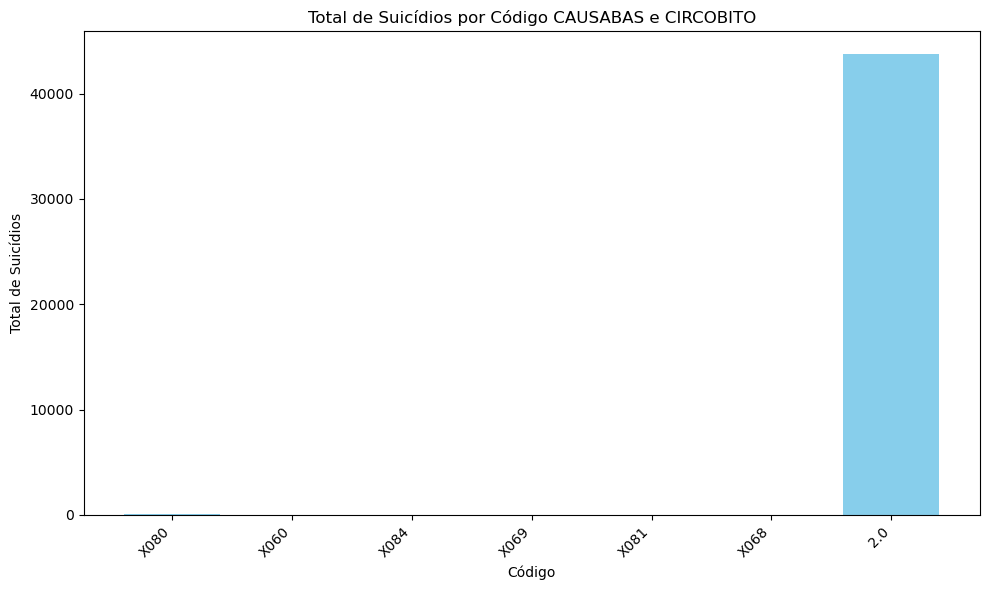

In [75]:
# Convert codes to strings
codes = [str(code) for code in codes]


import matplotlib.pyplot as plt

# Combine both total_counts_causa and total_counts_circo dictionaries
total_counts_combined = {**total_counts_causa, **total_counts_circo}

# Extract the codes and counts
codes = list(total_counts_combined.keys())
counts = list(total_counts_combined.values())

# Convert codes to strings
codes = [str(code) for code in codes]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(codes, counts, color='skyblue')
plt.xlabel('Código')
plt.ylabel('Total de Suicídios')
plt.title('Total de Suicídios por Código CAUSABAS e CIRCOBITO')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
